# Training the GAN (128x128)

The aim of this first Notebook is to train the network – from the loading of the 128x128 images dataset to the generation of samples along the training. Analyzing the large set, the GAN should be able to generate new images belonging to the same class.
Several parameters can be changed, according to the explanations found in the [README of the attached repository](https://github.com/kaugrv/models_words), which may also help understanding how this Notebook works.


## Data

Training data is made of a dataset of 128x128 images. Use at least 10,000 images.

## Loading

Import libraries

In [1]:
import os
import matplotlib.pyplot as plt

from models.WGANGP import WGANGP
from utils.loaders import load_dataset

import pickle
import tensorflow as tf

D:\Users\derobil\miniconda3\envs\generative\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Users\derobil\miniconda3\envs\generative\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Users\derobil\miniconda3\envs\generative\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Users\derobil\miniconda3\envs\generative\lib\s

D:\Users\derobil\miniconda3\envs\generative\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Users\derobil\miniconda3\envs\generative\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Users\derobil\miniconda3\envs\generative\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Users\derobil\miniconda3\

Run parameters

In [6]:
# run parameters
SECTION = 'gan'
RUN_ID = '0001'
DATA_NAME = 'dataset'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

#'load' to load old training or 'build' to create new training
mode = 'build' 

Training parameters

In [7]:
# number of images treated at once
BATCH_SIZE = 16 

# image size, in pixels
IMAGE_SIZE = 128 

Load data

Found 10000 images belonging to 1 classes.
128


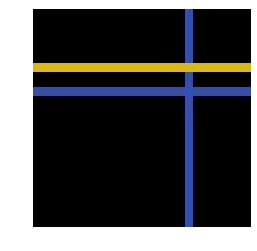

In [8]:
x_train = load_dataset(DATA_NAME, IMAGE_SIZE, BATCH_SIZE)

# show one image from the dataset
plt.axis("off")
plt.imshow(((x_train[0][0][0]+1)/2).squeeze()) 

## Training

WGAN parameters

In [9]:
# specify size of layers and convolution
gan = WGANGP(input_dim=(IMAGE_SIZE, IMAGE_SIZE, 3), 
             critic_conv_filters=[128, 256, 512, 1024], 
             critic_conv_kernel_size=[3,3,3,3], 
             critic_conv_strides=[2, 2, 2, 2], 
             critic_batch_norm_momentum=None, 
             critic_activation='leaky_relu', 
             critic_dropout_rate=None, 
             critic_learning_rate=0.0002, 
             generator_initial_dense_layer_size=(8, 8, 512), 
             generator_upsample=[1, 1, 1, 1], 
             generator_conv_filters=[512, 256, 128, 3], 
             generator_conv_kernel_size=[6,6,6,6], 
             generator_conv_strides=[2, 2, 2, 2], 
             generator_batch_norm_momentum=0.9, 
             generator_activation='leaky_relu', 
             generator_dropout_rate=None, 
             generator_learning_rate=0.0002, 
             optimiser='adam', 
             grad_weight=10, 
             z_dim=100, 
             batch_size=BATCH_SIZE
             )

if mode == 'build':
    gan.save(RUN_FOLDER)

else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
(128, 128, 3)
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


Training parameters

In [10]:
# number of steps 
EPOCHS = 1+1200 

 # generates a sample every PRINT_EVERY_N_BATCHES step
PRINT_EVERY_N_BATCHES = 100

N_CRITIC = 5

Run the training [time]

In [11]:
# rows and colums of images each sample
rows = 3
columns = 3

gan.train(rows, columns,
    x_train,
    batch_size=BATCH_SIZE, 
    epochs=EPOCHS, 
    run_folder=RUN_FOLDER, 
    print_every_n_batches=PRINT_EVERY_N_BATCHES, 
    n_critic=N_CRITIC, 
    using_generator=True
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
0 (5, 1) [D loss: (-15.7)(R -23.5, F 1.6, G 0.6)] [G loss: -3.0]
1 (5, 1) [D loss: (-358.6)(R -542.6, F 127.8, G 5.6)] [G loss: -201.0]
2 (5, 1) [D loss: (-566.5)(R -1138.2, F 271.2, G 30.1)] [G loss: -280.7]
3 (5, 1) [D loss: (-629.6)(R -1356.5, F 307.7, G 41.9)] [G loss: -261.2]
4 (5, 1) [D loss: (-571.7)(R -1299.5, F 313.8, G 41.4)] [G loss: -274.9]
5 (5, 1) [D loss: (-486.8)(R -1123.0, F 334.0, G 30.2)] [G loss: -357.1]
6 (5, 1) [D loss: (-400.6)(R -1070.0, F 396.8, G 27.3)] [G loss: -373.3]
7 (5, 1) [D loss: (-338.8)(R -958.4, F 400.7, G 21.9)] [G loss: -358.6]
8 (5, 1) [D loss: (-296.7)(R -756.9, F 299.2, G 16.1)] [G loss: -369.0]
9 (5, 1) [D loss: (-274.9)(R -753.5, F 310.5, G 16.8)] [G loss: -281.0]
10 (5, 1) [D loss: (-267.6)(R -767.6, F 321.4, G 17.9)] [G loss: -158.9]
11 (5, 1) [D loss: (-279.6)(R -614.1, F 181.5, G 15.3)] [G loss: -307.9]
12 (5, 1) [D loss: (-245.4)(R -828.9, F 409

105 (5, 1) [D loss: (-131.1)(R -104.1, F -102.3, G 7.5)] [G loss: 127.3]
106 (5, 1) [D loss: (-198.6)(R -207.6, F -80.8, G 9.0)] [G loss: 70.6]
107 (5, 1) [D loss: (-169.3)(R -67.0, F -205.5, G 10.3)] [G loss: 215.0]
108 (5, 1) [D loss: (-163.9)(R 27.7, F -260.1, G 6.9)] [G loss: 141.8]
109 (5, 1) [D loss: (-169.5)(R -144.8, F -125.3, G 10.0)] [G loss: 145.1]
110 (5, 1) [D loss: (-166.3)(R -108.9, F -152.2, G 9.5)] [G loss: 86.9]
111 (5, 1) [D loss: (-121.9)(R -77.0, F -116.3, G 7.1)] [G loss: 188.1]
112 (5, 1) [D loss: (-144.8)(R -90.9, F -137.4, G 8.3)] [G loss: 205.2]
113 (5, 1) [D loss: (-132.3)(R -45.4, F -188.7, G 10.2)] [G loss: 336.3]
114 (5, 1) [D loss: (-157.1)(R -30.8, F -204.3, G 7.8)] [G loss: 242.1]
115 (5, 1) [D loss: (-173.8)(R -103.4, F -146.8, G 7.6)] [G loss: 109.9]
116 (5, 1) [D loss: (-114.2)(R 36.9, F -229.2, G 7.8)] [G loss: 151.2]
117 (5, 1) [D loss: (-163.3)(R -206.0, F -32.2, G 7.5)] [G loss: 30.8]
118 (5, 1) [D loss: (-143.2)(R -106.4, F -128.9, G 9.2)] [G lo

221 (5, 1) [D loss: (-82.3)(R 6.3, F -130.5, G 4.2)] [G loss: 189.0]
222 (5, 1) [D loss: (-99.9)(R 210.8, F -349.8, G 3.9)] [G loss: 319.0]
223 (5, 1) [D loss: (-100.3)(R 84.3, F -233.1, G 4.9)] [G loss: 246.1]
224 (5, 1) [D loss: (-87.7)(R 200.9, F -328.6, G 4.0)] [G loss: 300.0]
225 (5, 1) [D loss: (-91.4)(R 27.2, F -163.8, G 4.5)] [G loss: 218.7]
226 (5, 1) [D loss: (-106.4)(R 180.0, F -330.7, G 4.4)] [G loss: 286.0]
227 (5, 1) [D loss: (-84.4)(R 164.7, F -296.3, G 4.7)] [G loss: 326.5]
228 (5, 1) [D loss: (-83.3)(R -26.6, F -104.8, G 4.8)] [G loss: 190.4]
229 (5, 1) [D loss: (-101.3)(R 61.2, F -207.5, G 4.5)] [G loss: 186.1]
230 (5, 1) [D loss: (-83.5)(R 187.8, F -298.4, G 2.7)] [G loss: 271.5]
231 (5, 1) [D loss: (-95.5)(R 51.4, F -181.2, G 3.4)] [G loss: 151.5]
232 (5, 1) [D loss: (-80.7)(R 133.7, F -255.7, G 4.1)] [G loss: 272.8]
233 (5, 1) [D loss: (-82.8)(R 78.1, F -188.5, G 2.7)] [G loss: 194.3]
234 (5, 1) [D loss: (-67.0)(R 178.6, F -270.3, G 2.5)] [G loss: 281.8]
235 (5, 1)

338 (5, 1) [D loss: (-77.4)(R 12.3, F -122.7, G 3.3)] [G loss: 110.5]
339 (5, 1) [D loss: (-84.1)(R -33.8, F -97.7, G 4.7)] [G loss: 79.1]
340 (5, 1) [D loss: (-82.6)(R -37.9, F -87.6, G 4.3)] [G loss: 75.8]
341 (5, 1) [D loss: (-74.8)(R 20.5, F -130.3, G 3.5)] [G loss: 177.3]
342 (5, 1) [D loss: (-76.1)(R -25.0, F -88.1, G 3.7)] [G loss: 112.1]
343 (5, 1) [D loss: (-78.3)(R -17.2, F -98.0, G 3.7)] [G loss: 82.6]
344 (5, 1) [D loss: (-86.6)(R -54.1, F -75.9, G 4.3)] [G loss: 55.1]
345 (5, 1) [D loss: (-93.2)(R -2.6, F -125.6, G 3.5)] [G loss: 134.1]
346 (5, 1) [D loss: (-66.1)(R 16.9, F -120.9, G 3.8)] [G loss: 170.3]
347 (5, 1) [D loss: (-96.5)(R -17.5, F -117.5, G 3.9)] [G loss: 106.8]
348 (5, 1) [D loss: (-88.5)(R 36.7, F -162.0, G 3.7)] [G loss: 150.4]
349 (5, 1) [D loss: (-90.5)(R -39.8, F -102.1, G 5.1)] [G loss: 106.7]
350 (5, 1) [D loss: (-85.8)(R 2.0, F -128.3, G 4.0)] [G loss: 111.0]
351 (5, 1) [D loss: (-80.1)(R 13.2, F -139.8, G 4.6)] [G loss: 115.3]
352 (5, 1) [D loss: (-7

455 (5, 1) [D loss: (-58.0)(R 2.6, F -104.4, G 4.4)] [G loss: 96.5]
456 (5, 1) [D loss: (-80.9)(R 47.4, F -163.1, G 3.5)] [G loss: 159.6]
457 (5, 1) [D loss: (-83.0)(R 61.0, F -181.0, G 3.7)] [G loss: 180.3]
458 (5, 1) [D loss: (-80.4)(R -3.0, F -116.2, G 3.9)] [G loss: 129.5]
459 (5, 1) [D loss: (-85.6)(R 20.9, F -143.1, G 3.7)] [G loss: 138.9]
460 (5, 1) [D loss: (-89.6)(R 47.0, F -169.7, G 3.3)] [G loss: 143.4]
461 (5, 1) [D loss: (-83.5)(R 64.3, F -189.1, G 4.1)] [G loss: 192.4]
462 (5, 1) [D loss: (-76.2)(R 106.9, F -220.6, G 3.7)] [G loss: 238.3]
463 (5, 1) [D loss: (-68.7)(R 1.2, F -101.0, G 3.1)] [G loss: 149.5]
464 (5, 1) [D loss: (-63.9)(R -10.2, F -102.7, G 4.9)] [G loss: 70.2]
465 (5, 1) [D loss: (-81.6)(R 37.0, F -153.8, G 3.5)] [G loss: 139.5]
466 (5, 1) [D loss: (-90.0)(R 25.2, F -167.3, G 5.2)] [G loss: 179.1]
467 (5, 1) [D loss: (-70.3)(R 111.2, F -225.7, G 4.4)] [G loss: 227.0]
468 (5, 1) [D loss: (-65.7)(R 86.5, F -189.7, G 3.8)] [G loss: 185.0]
469 (5, 1) [D loss: (

573 (5, 1) [D loss: (-59.4)(R 16.1, F -108.6, G 3.3)] [G loss: 132.1]
574 (5, 1) [D loss: (-71.2)(R 1.0, F -103.8, G 3.2)] [G loss: 89.4]
575 (5, 1) [D loss: (-66.9)(R 2.4, F -98.7, G 2.9)] [G loss: 132.0]
576 (5, 1) [D loss: (-62.7)(R 11.0, F -99.9, G 2.6)] [G loss: 105.0]
577 (5, 1) [D loss: (-69.4)(R -2.7, F -104.0, G 3.7)] [G loss: 87.6]
578 (5, 1) [D loss: (-74.1)(R 29.7, F -129.8, G 2.6)] [G loss: 152.7]
579 (5, 1) [D loss: (-72.8)(R -16.6, F -95.7, G 3.9)] [G loss: 75.8]
580 (5, 1) [D loss: (-50.4)(R 86.6, F -160.3, G 2.3)] [G loss: 137.7]
581 (5, 1) [D loss: (-70.0)(R 28.4, F -126.5, G 2.8)] [G loss: 75.6]
582 (5, 1) [D loss: (-57.2)(R 27.6, F -112.7, G 2.8)] [G loss: 92.8]
583 (5, 1) [D loss: (-66.9)(R 12.3, F -107.8, G 2.8)] [G loss: 77.3]
584 (5, 1) [D loss: (-61.1)(R 7.2, F -92.9, G 2.5)] [G loss: 80.2]
585 (5, 1) [D loss: (-71.6)(R 10.5, F -107.6, G 2.5)] [G loss: 112.7]
586 (5, 1) [D loss: (-50.0)(R -17.0, F -67.8, G 3.5)] [G loss: 8.1]
587 (5, 1) [D loss: (-60.1)(R 61.2,

692 (5, 1) [D loss: (-65.2)(R -39.8, F -53.9, G 2.8)] [G loss: 51.1]
693 (5, 1) [D loss: (-72.5)(R -38.5, F -64.2, G 3.0)] [G loss: 57.3]
694 (5, 1) [D loss: (-64.9)(R -1.0, F -94.9, G 3.1)] [G loss: 93.3]
695 (5, 1) [D loss: (-74.0)(R -15.9, F -85.5, G 2.7)] [G loss: 99.3]
696 (5, 1) [D loss: (-59.1)(R -28.2, F -62.9, G 3.2)] [G loss: 66.8]
697 (5, 1) [D loss: (-58.9)(R -67.1, F -23.9, G 3.2)] [G loss: 38.0]
698 (5, 1) [D loss: (-61.0)(R -17.4, F -69.8, G 2.6)] [G loss: 52.9]
699 (5, 1) [D loss: (-64.9)(R -6.1, F -89.2, G 3.0)] [G loss: 96.6]
700 (5, 1) [D loss: (-78.2)(R -42.9, F -59.3, G 2.4)] [G loss: 41.5]
701 (5, 1) [D loss: (-58.1)(R -7.8, F -73.7, G 2.3)] [G loss: 78.7]
702 (5, 1) [D loss: (-78.3)(R -31.5, F -84.4, G 3.8)] [G loss: 80.2]
703 (5, 1) [D loss: (-63.8)(R -32.1, F -60.9, G 2.9)] [G loss: 66.9]
704 (5, 1) [D loss: (-74.2)(R -3.1, F -93.5, G 2.2)] [G loss: 94.2]
705 (5, 1) [D loss: (-60.7)(R -25.6, F -67.3, G 3.2)] [G loss: 72.8]
706 (5, 1) [D loss: (-72.1)(R -47.2, F

812 (5, 1) [D loss: (-61.1)(R -53.1, F -38.3, G 3.0)] [G loss: 47.9]
813 (5, 1) [D loss: (-62.3)(R -42.2, F -52.0, G 3.2)] [G loss: 88.3]
814 (5, 1) [D loss: (-74.5)(R -43.8, F -60.0, G 2.9)] [G loss: 50.7]
815 (5, 1) [D loss: (-56.3)(R -49.9, F -33.1, G 2.7)] [G loss: 59.9]
816 (5, 1) [D loss: (-73.6)(R -40.1, F -60.3, G 2.7)] [G loss: 68.2]
817 (5, 1) [D loss: (-68.2)(R -47.5, F -46.6, G 2.6)] [G loss: 58.7]
818 (5, 1) [D loss: (-62.0)(R -82.3, F -15.2, G 3.5)] [G loss: 22.0]
819 (5, 1) [D loss: (-46.7)(R -37.3, F -42.0, G 3.3)] [G loss: 39.9]
820 (5, 1) [D loss: (-66.2)(R -11.3, F -77.4, G 2.2)] [G loss: 93.0]
821 (5, 1) [D loss: (-55.2)(R 6.4, F -87.2, G 2.6)] [G loss: 83.0]
822 (5, 1) [D loss: (-52.8)(R -53.2, F -36.7, G 3.7)] [G loss: 53.5]
823 (5, 1) [D loss: (-66.3)(R -6.4, F -83.4, G 2.4)] [G loss: 75.7]
824 (5, 1) [D loss: (-65.9)(R 7.6, F -105.4, G 3.2)] [G loss: 90.7]
825 (5, 1) [D loss: (-61.3)(R -19.4, F -74.6, G 3.3)] [G loss: 60.7]
826 (5, 1) [D loss: (-56.1)(R -36.2, F

931 (5, 1) [D loss: (-62.7)(R -52.2, F -47.9, G 3.7)] [G loss: 69.3]
932 (5, 1) [D loss: (-60.5)(R -50.3, F -38.8, G 2.9)] [G loss: 52.9]
933 (5, 1) [D loss: (-58.6)(R -30.8, F -57.3, G 3.0)] [G loss: 53.4]
934 (5, 1) [D loss: (-65.2)(R -30.1, F -64.8, G 3.0)] [G loss: 72.2]
935 (5, 1) [D loss: (-63.2)(R -53.9, F -39.6, G 3.0)] [G loss: 37.3]
936 (5, 1) [D loss: (-43.5)(R -46.9, F -31.0, G 3.4)] [G loss: 8.0]
937 (5, 1) [D loss: (-69.3)(R -17.2, F -73.8, G 2.2)] [G loss: 54.3]
938 (5, 1) [D loss: (-62.1)(R -30.1, F -59.0, G 2.7)] [G loss: 63.6]
939 (5, 1) [D loss: (-70.2)(R -54.0, F -49.3, G 3.3)] [G loss: 65.2]
940 (5, 1) [D loss: (-71.9)(R -29.7, F -64.7, G 2.3)] [G loss: 54.9]
941 (5, 1) [D loss: (-69.6)(R -33.0, F -66.5, G 3.0)] [G loss: 80.5]
942 (5, 1) [D loss: (-56.2)(R -67.7, F -15.0, G 2.7)] [G loss: 29.7]
943 (5, 1) [D loss: (-67.9)(R -28.1, F -66.0, G 2.6)] [G loss: 68.8]
944 (5, 1) [D loss: (-61.6)(R 24.7, F -109.9, G 2.4)] [G loss: 94.9]
945 (5, 1) [D loss: (-65.3)(R 2.4, 

1050 (5, 1) [D loss: (-63.0)(R -45.5, F -50.7, G 3.3)] [G loss: 44.1]
1051 (5, 1) [D loss: (-76.0)(R -19.7, F -80.9, G 2.5)] [G loss: 61.2]
1052 (5, 1) [D loss: (-73.2)(R -29.3, F -71.1, G 2.7)] [G loss: 58.9]
1053 (5, 1) [D loss: (-72.7)(R -35.2, F -67.4, G 3.0)] [G loss: 56.1]
1054 (5, 1) [D loss: (-52.3)(R -15.5, F -64.7, G 2.8)] [G loss: 62.4]
1055 (5, 1) [D loss: (-67.7)(R 5.6, F -97.1, G 2.4)] [G loss: 89.1]
1056 (5, 1) [D loss: (-67.2)(R -8.5, F -81.1, G 2.2)] [G loss: 67.4]
1057 (5, 1) [D loss: (-53.6)(R -45.0, F -37.8, G 2.9)] [G loss: 46.3]
1058 (5, 1) [D loss: (-66.6)(R 12.4, F -106.8, G 2.8)] [G loss: 107.3]
1059 (5, 1) [D loss: (-68.7)(R -22.1, F -78.7, G 3.2)] [G loss: 64.2]
1060 (5, 1) [D loss: (-66.5)(R -72.0, F -24.5, G 3.0)] [G loss: 45.4]
1061 (5, 1) [D loss: (-60.2)(R 3.9, F -94.8, G 3.1)] [G loss: 86.7]
1062 (5, 1) [D loss: (-54.3)(R -25.1, F -64.5, G 3.5)] [G loss: 73.5]
1063 (5, 1) [D loss: (-63.9)(R -40.8, F -55.1, G 3.2)] [G loss: 67.4]
1064 (5, 1) [D loss: (-5

1168 (5, 1) [D loss: (-48.0)(R -52.1, F -29.7, G 3.4)] [G loss: 43.3]
1169 (5, 1) [D loss: (-55.1)(R 16.1, F -95.7, G 2.4)] [G loss: 94.6]
1170 (5, 1) [D loss: (-69.6)(R -51.7, F -49.3, G 3.1)] [G loss: 64.7]
1171 (5, 1) [D loss: (-73.1)(R -47.4, F -54.7, G 2.9)] [G loss: 48.1]
1172 (5, 1) [D loss: (-61.9)(R -22.1, F -70.0, G 3.0)] [G loss: 97.4]
1173 (5, 1) [D loss: (-59.9)(R -43.5, F -55.6, G 3.9)] [G loss: 23.3]
1174 (5, 1) [D loss: (-53.0)(R -34.3, F -42.6, G 2.4)] [G loss: 70.6]
1175 (5, 1) [D loss: (-64.6)(R -7.9, F -83.9, G 2.7)] [G loss: 72.5]
1176 (5, 1) [D loss: (-60.1)(R -5.4, F -85.0, G 3.0)] [G loss: 88.5]
1177 (5, 1) [D loss: (-58.2)(R -28.1, F -59.4, G 2.9)] [G loss: 53.4]
1178 (5, 1) [D loss: (-68.3)(R -75.1, F -26.1, G 3.3)] [G loss: 48.6]
1179 (5, 1) [D loss: (-68.9)(R -18.4, F -76.3, G 2.6)] [G loss: 76.7]
1180 (5, 1) [D loss: (-72.9)(R 2.0, F -109.0, G 3.4)] [G loss: 109.3]
1181 (5, 1) [D loss: (-80.5)(R -31.5, F -77.2, G 2.8)] [G loss: 58.5]
1182 (5, 1) [D loss: (-

## Results

Plotting a graph : loss function according to epochs. Therefore the convergence of the training could be approached and commented on.

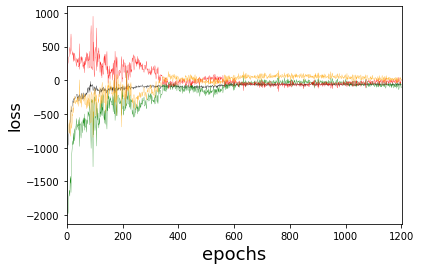

In [ ]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot(gan.g_losses, color='orange', linewidth=0.25)

plt.xlabel('epochs', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, EPOCHS)
plt.axis_x=range(0, EPOCHS) 

plt.savefig(RUN_FOLDER+"/images/Converge.png")
plt.show()


Download the graph and output images



In [ ]:
%cd /content/models_words/run/gan/0001_dataset/images
!zip 'output.zip' *

from google.colab import files
files.download('output.zip')

/content/gantraining/run/gan/0001_dataset/images
  adding: Converge.png (deflated 3%)
  adding: sample_0.png (deflated 0%)
  adding: sample_1000.png (deflated 2%)
  adding: sample_100.png (deflated 1%)
  adding: sample_1100.png (deflated 1%)
  adding: sample_1200.png (deflated 1%)
  adding: sample_200.png (deflated 1%)
  adding: sample_300.png (deflated 1%)
  adding: sample_400.png (deflated 1%)
  adding: sample_500.png (deflated 1%)
  adding: sample_600.png (deflated 1%)
  adding: sample_700.png (deflated 1%)
  adding: sample_800.png (deflated 1%)
  adding: sample_900.png (deflated 2%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download generator.h5 – the output model of the generator. This will be useful for inference, cf the next step : [inference.ipynb](https://colab.research.google.com/drive/13g3rX2zgyxT5YKTZILBrISybmLJ4_pXi).

In [ ]:
%cd /content/models_words/run/gan/0001_dataset/

from google.colab import files
files.download('generator.h5')

/content/gantraining/run/gan/0001_dataset


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>